Cross-validation accuracy scores: [0.92983457 0.93667998 0.9423516  0.93550228 0.94406393]
Mean cross-validation accuracy: 93.77%
Random Forest Accuracy on Test Set: 94.89%
Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.97      0.96       193
           2       0.95      0.96      0.96       180
           3       0.91      0.95      0.93       172
           4       0.98      0.94      0.96       181
           5       0.93      0.95      0.94       187
           6       0.97      0.93      0.95       181
           7       0.98      0.94      0.96       181
           8       0.91      0.95      0.93       178
           9       0.94      0.97      0.95       189
          10       0.93      0.94      0.94       179
          11       0.95      0.93      0.94       183
          12       0.98      0.94      0.96       187

    accuracy                           0.95      2191
   macro avg       0.95      0.95      0.95   

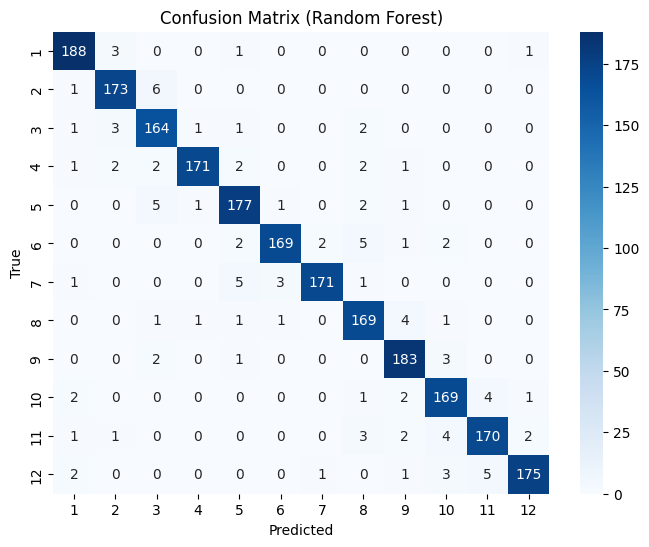


Cross-validation and Model Performance Summary:
           Model  CV Mean Accuracy  Test Set Accuracy
0  Random Forest         93.768647          94.888179


In [1]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load PCA results
pca_data = pd.read_csv('combined_land_marks_with_target_cleaned.csv')

# Separate features and labels
features = pca_data.drop(columns=['target'])  # Adjust column name if needed
labels = pca_data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize Random Forest model
rf = RandomForestClassifier(n_estimators=500, random_state=42)

# Cross-validation (5-fold) to evaluate model
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean() * 100:.2f}%")

# Train the Random Forest model on the full training data
rf.fit(X_train, y_train)

# Predict on test set
rf_predictions = rf.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy on Test Set: {rf_accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, rf_predictions))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, rf_predictions)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels.unique(), yticklabels=labels.unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

# Summarize results in a table format
cv_summary = {
    'Model': ['Random Forest'],
    'CV Mean Accuracy': [cv_scores.mean() * 100],  # Mean CV score
    'Test Set Accuracy': [rf_accuracy * 100],      # Test set accuracy
}

cv_summary_df = pd.DataFrame(cv_summary)
print("\nCross-validation and Model Performance Summary:")
print(cv_summary_df)



In [ ]:
import pickle

# Save the trained model to a file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf, file)